In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [4]:
# Create some dummy data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=40)

In [5]:
X[:5,:]

array([[ 1.12019791,  1.43098876],
       [ 1.06185771,  2.00130446],
       [ 0.0178096 , -0.34199273],
       [-3.35316079, -2.13115411],
       [ 1.12025937,  1.65769032]])

In [6]:
y[:5]

array([0, 0, 1, 1, 0])

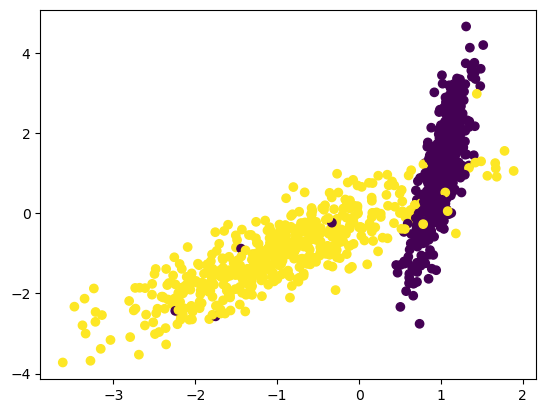

In [7]:
plt.scatter(X[:,0], X[:,1], c= y)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

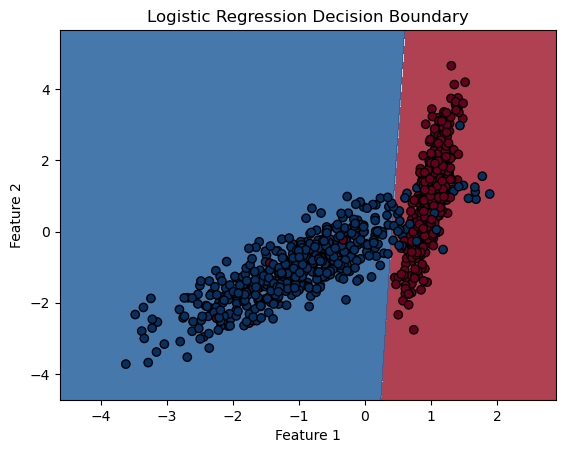

In [10]:
# Generate a mesh grid for the entire feature space
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 1000))

# Predict the class labels for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.94
Confusion Matrix:
[[97  4]
 [ 8 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       101
           1       0.96      0.92      0.94        99

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



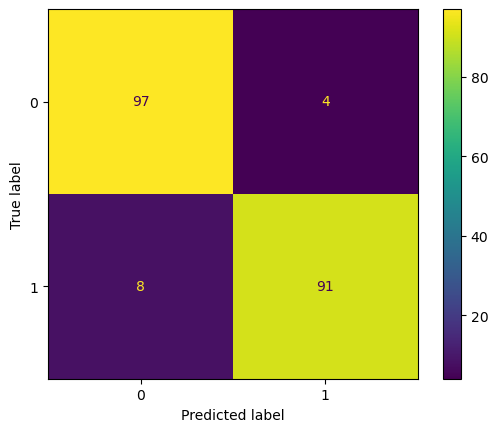

In [13]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

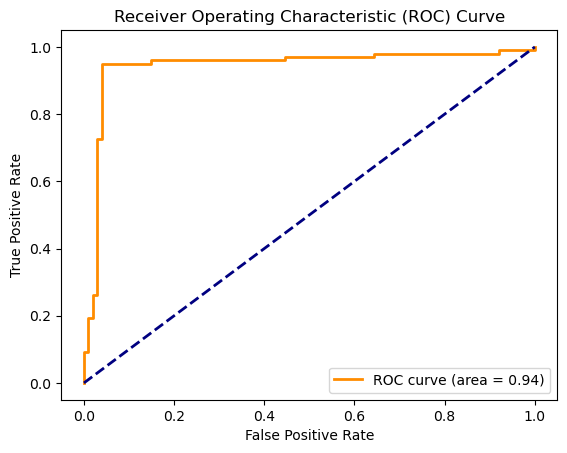

In [14]:
# Plot ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()